## Real Estate Price Prediction

Real estate is a pivotal sector influenced by location, economic trends, demographics, and regulations. It attracts various stakeholders, from individual homeowners to institutional investors, all seeking to capitalize on property value dynamics for financial gain and strategic planning.
We aim to leverage advanced machine learning techniques, particularly deep learning models like neural networks, to forecast property values with greater accuracy. By analyzing factors such as location, property characteristics, economic indicators, and market trends, I intend to provide reliable predictions that can support informed decision-making in real estate investment and planning.

<p><center><img src="https://time.com/personal-finance/static/55144cd484316e09fe57efd6af2b6a15/ca7ff/invest-in-real-estate.jpg" style="width:500px"> <br></center></p>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!pip install jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [94]:
house_df = pd.read_csv('realestate_prices.csv', encoding = 'ISO-8859-1')
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [95]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Understanding Data Distributions

Ultimately, data visualization is essential for effective data exploration, model development, and communication of findings.
Making complex insights accessible to stakeholders and detecting anomalies, facilitates comparative analysis, and improves model interpretability. Interactive visualizations enhance data exploration, ensuring data quality by highlighting inconsistencies.


<Axes: xlabel='sqft_living', ylabel='price'>

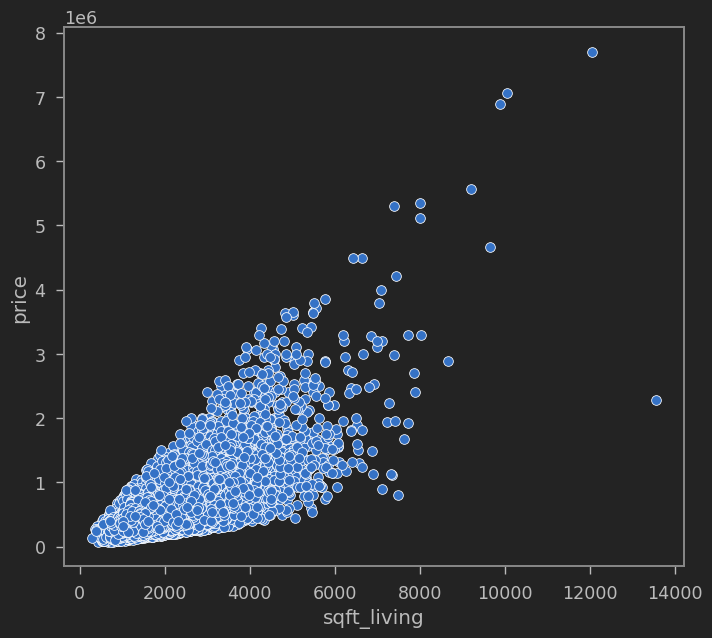

In [96]:
sns.scatterplot(x = 'sqft_living', y = 'price', data = house_df)

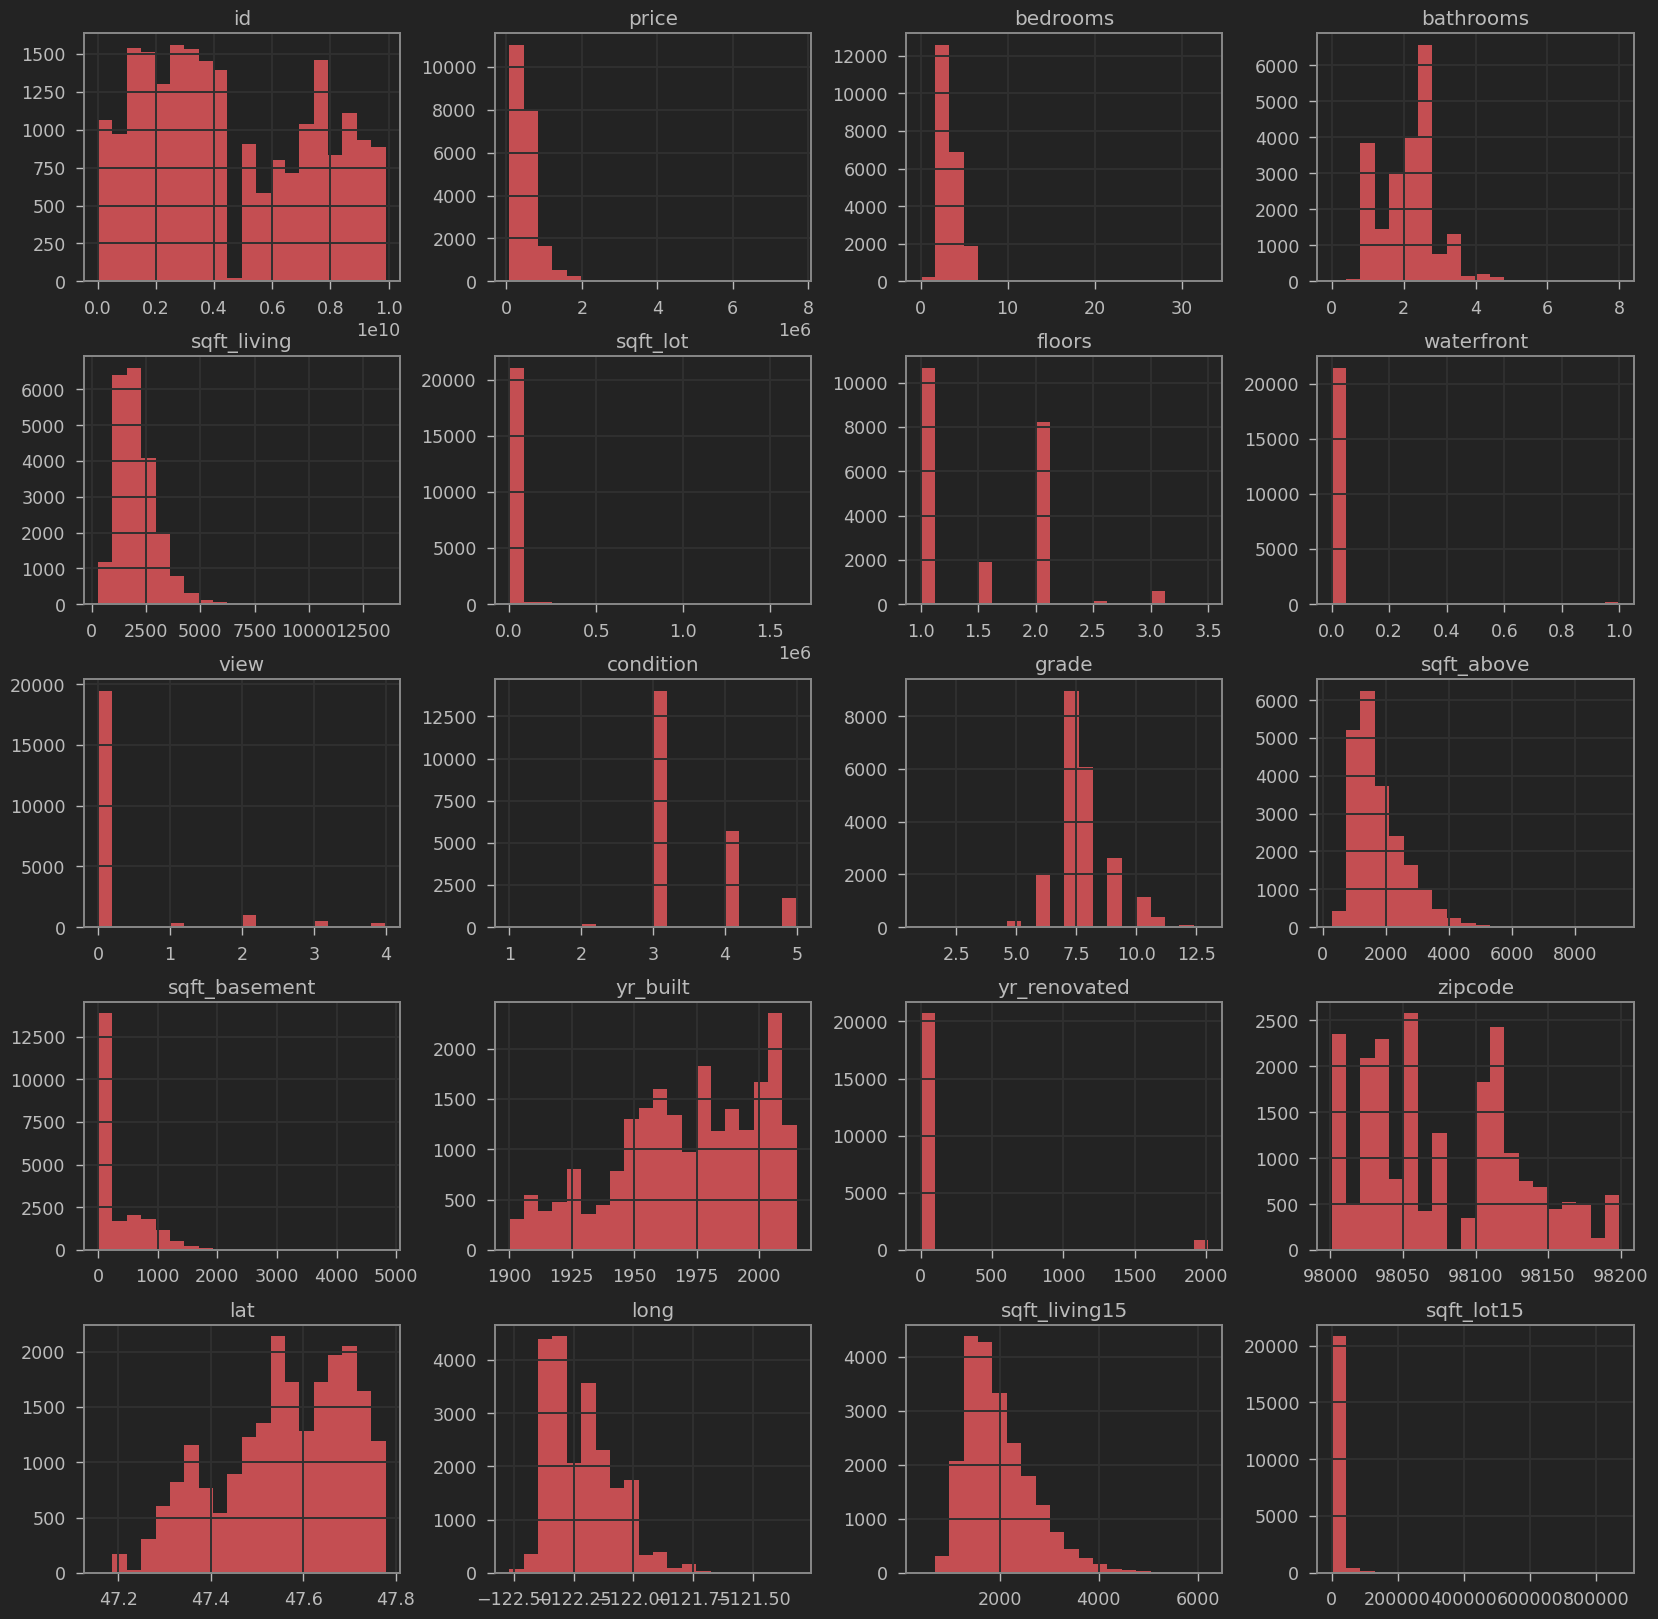

In [97]:
house_df.hist(bins = 20, figsize = (20,20), color = 'r');

In [98]:
house_df_sample = house_df[ ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built']   ]
house_df_sample

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built
0,221900.0,3,1.00,1180,5650,1180,0,1955
1,538000.0,3,2.25,2570,7242,2170,400,1951
2,180000.0,2,1.00,770,10000,770,0,1933
3,604000.0,4,3.00,1960,5000,1050,910,1965
4,510000.0,3,2.00,1680,8080,1680,0,1987
...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,1530,0,2009
21609,400000.0,4,2.50,2310,5813,2310,0,2014
21610,402101.0,2,0.75,1020,1350,1020,0,2009
21611,400000.0,3,2.50,1600,2388,1600,0,2004


# Removing Price Outliers

Data cleaning and feature engineering are vital for accurate real estate price prediction. Cleaning data addresses missing values, outliers, and quality issues, preventing biases.
This process ensures reliable and effective model predictions.

In [99]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']
X = house_df[selected_features]
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180,0
1,3,2.25,2570,7242,2.0,2170,400
2,2,1.00,770,10000,1.0,770,0
3,4,3.00,1960,5000,1.0,1050,910
4,3,2.00,1680,8080,1.0,1680,0
...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,1530,0
21609,4,2.50,2310,5813,2.0,2310,0
21610,2,0.75,1020,1350,2.0,1020,0
21611,3,2.50,1600,2388,2.0,1600,0


In [100]:
y = house_df['price']
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [101]:
X.shape

(21613, 7)

In [102]:
y.shape

(21613,)

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

In [104]:
X_scaled.shape

(21613, 7)

In [105]:
scaler.data_max_

array([3.300000e+01, 8.000000e+00, 1.354000e+04, 1.651359e+06,
       3.500000e+00, 9.410000e+03, 4.820000e+03])

In [106]:
scaler.data_min_

array([  0.,   0., 290., 520.,   1., 290.,   0.])

In [107]:
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

# Training a Targeted Deep Learning Model for Property Price Forecasting

This approach aims to accurately predict real estate values by focusing on key market influencers, enhancing predictive accuracy and adaptability to market dynamics.

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [109]:
X_train.shape

(16209, 7)

In [110]:
X_test.shape

(5404, 7)

In [111]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim = 7, activation = 'relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation = 'linear'))

In [112]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 100)               800       
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 21101 (82.43 KB)
Trainable params: 21101 (82.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [113]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

# Measuring Model Efficiency

Measuring model efficiency in real estate prediction involves assessing how well a model delivers accurate predictions with minimal computational resources and time.

In [115]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

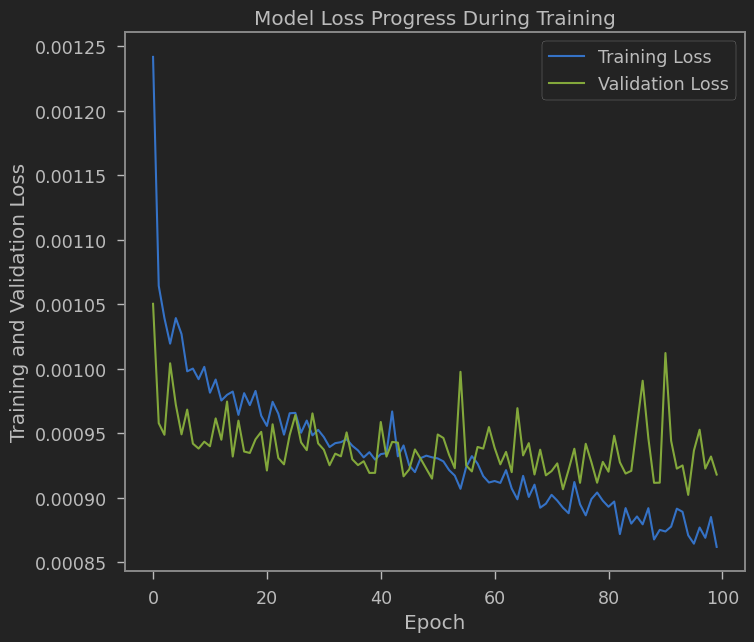

In [116]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

In [117]:
X_test_1 = np.array([[ 4, 3, 1960, 5000, 1, 2000, 3000 ]])

scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

y_predict_1 = model.predict(X_test_scaled_1)

y_predict_1 = scaler.inverse_transform(y_predict_1)
y_predict_1

1/1 [==============================] - 0s 73ms/step


array([[207096.72]], dtype=float32)

169/169 [==============================] - 0s 2ms/step


Text(0, 0.5, 'True Values')

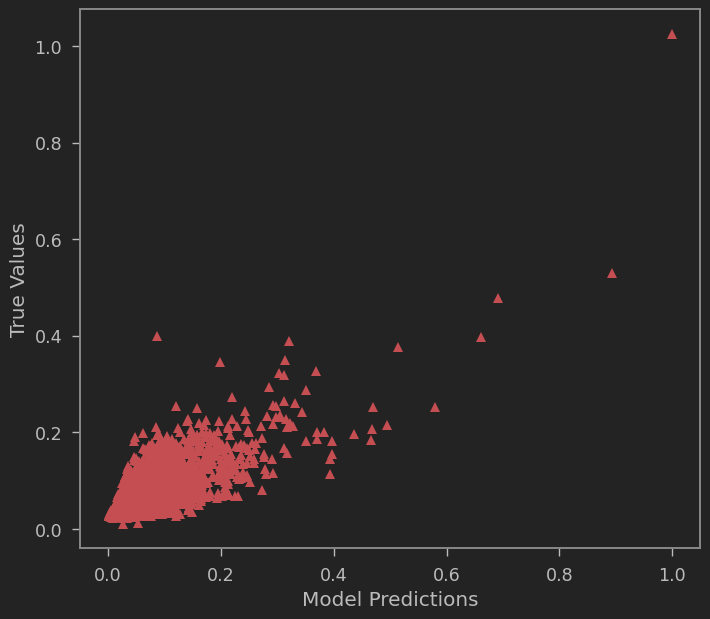

In [118]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [119]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

(0.0, 3000000.0)

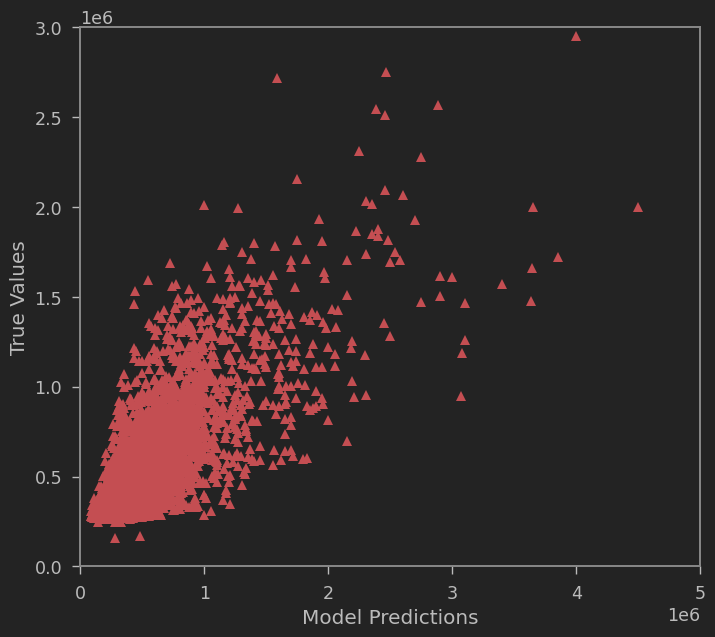

In [120]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [121]:
k = X_test.shape[1]
n = len(X_test)
n

5404

In [122]:
k

7

In [123]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 242246.429 
MSE = 58683332386.7975 
MAE = 155768.48486075128 
R2 = 0.6187864656070852 
Adjusted R2 = 0.6182919335943442


# Exploring The Impact Of Additional Real Estate INDEPENDANT Variables On Model

Studying the impact of additional independent variables in real estate involves assessing how diverse property features affect model training. This exploration aims to optimize predictive accuracy by integrating variables such as location attributes, thereby enhancing insights into property price dynamics.

In [124]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = house_df[selected_features]

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [126]:
y = house_df['price']

In [127]:
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [128]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim = 19, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [129]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, verbose = 1, validation_split = 0.2)

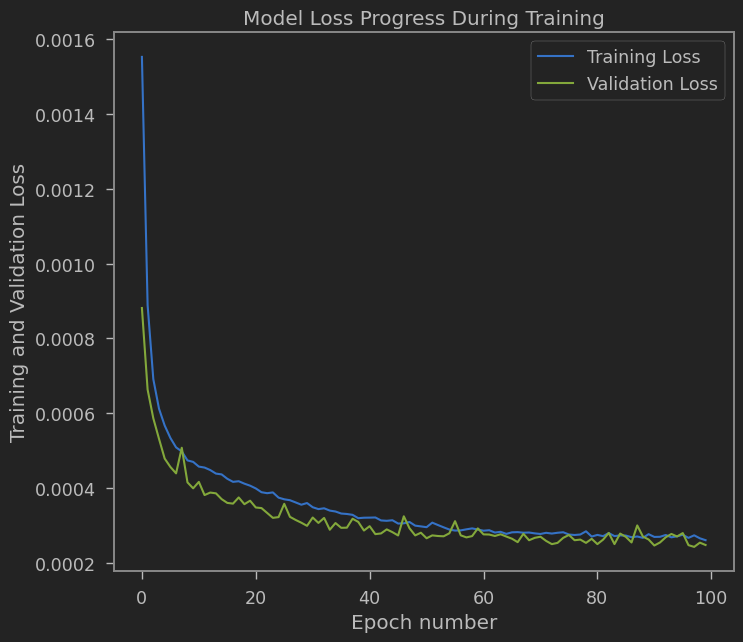

In [131]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

169/169 [==============================] - 0s 2ms/step


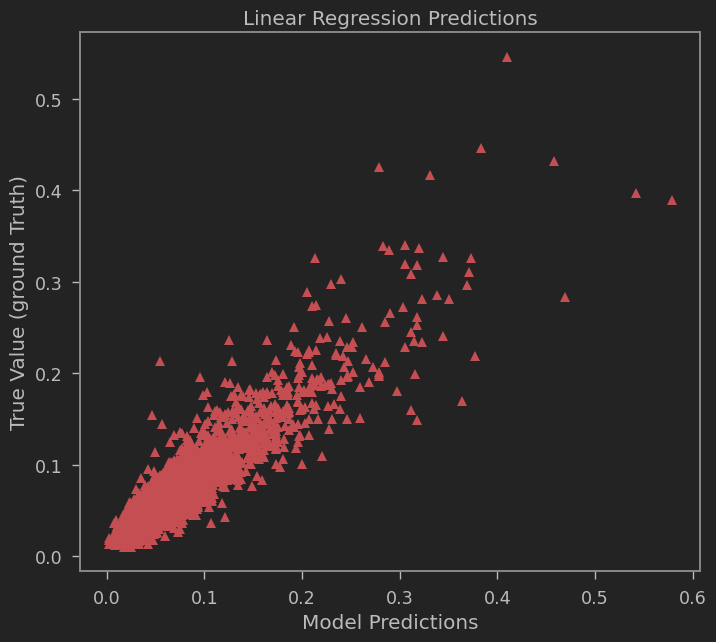

In [132]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [133]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


In [134]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)


RMSE = 132827.214 
MSE = 17643068728.983936 
MAE = 80431.01280879903 
R2 = 0.8591639320943047 
Adjusted R2 = 0.8589812314873106
